# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
TOKEN_SPAM_PROB_FILE = 'D:/GitRepositories/MachineLearning/ML_Udemy_Courses/Complete_2019_DS_ML_Bootcamp/SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'D:/GitRepositories/MachineLearning/ML_Udemy_Courses/Complete_2019_DS_ML_Bootcamp/SpamData/03_Testing/prob-ham.txt'
TOKEN_ALL_PROB_FILE = 'D:/GitRepositories/MachineLearning/ML_Udemy_Courses/Complete_2019_DS_ML_Bootcamp/SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX_FILE = 'D:/GitRepositories/MachineLearning/ML_Udemy_Courses/Complete_2019_DS_ML_Bootcamp/SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'D:/GitRepositories/MachineLearning/ML_Udemy_Courses/Complete_2019_DS_ML_Bootcamp/SpamData/03_Testing/test-target.txt'

VOCABULARY_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX_FILE, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

  # Calculating the Joint Probability

### The Dot Product

***Challenge:*** Can you figure out the dimensions of the dot product between X_test and prob_token_spam

In [5]:
X_test.shape

(1739, 2500)

In [6]:
prob_token_spam.shape

(2500,)

In [7]:
result = X_test.dot(prob_token_spam)
print(result)
print(result.shape)

[ 953.40290308 1101.94047932 1088.7762934  ... 6400.07684621 7175.72558007
 6955.72536023]
(1739,)


### Set the Prior
$$P(Spam \,|\,X) = \frac{P(X\,|\,Spam)\,P(Spam)}{P(X)}$$

In [8]:
PROB_SPAM = 0.3116

**Challenge**: Do you recall how to take the log of a numpy array? Calculate the log probabilities of the tokens given that the email was spam. This was stored in prob_token_spam. 

In [9]:
np.log(prob_token_spam)

array([ -7.23817241,  -8.08225999,  -7.81726933, ..., -11.52267809,
       -12.43896882, -13.82526318])

## Joint probability in log format

In [10]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)

In [11]:
joint_log_spam[:5]

array([22.39447929,  1.95629262, 17.8058085 , 16.77918399, 19.57481844])

**Challenge**: Calculate the log probability that the emails are non-spam given their tokens. Store the result in a variable called joint_log_ham

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [12]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_token_all)) + np.log(1-PROB_SPAM)

In [13]:
joint_log_ham[:5]

array([-56.85016672, -11.50510049, -35.09192716, -55.85220437,
       -51.17024554])

In [14]:
joint_log_ham.size

1739

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>**OR**</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

**Challenge**: Can you create the vector of predictions, our $\hat y$ ? Remember that spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store your results in a variable called `prediction`.

In [15]:
prediction = joint_log_spam > joint_log_ham

In [16]:
prediction[-5:]*1

array([1, 0, 0, 0, 0])

In [17]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [18]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [19]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1702
Docs classified incorrectly 37


In [20]:
# Accuracy
correct_docs/len(X_test)

0.9787234042553191

In [21]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.13%
Accuracy of the model is 97.87%


## Visualising the Results

In [22]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

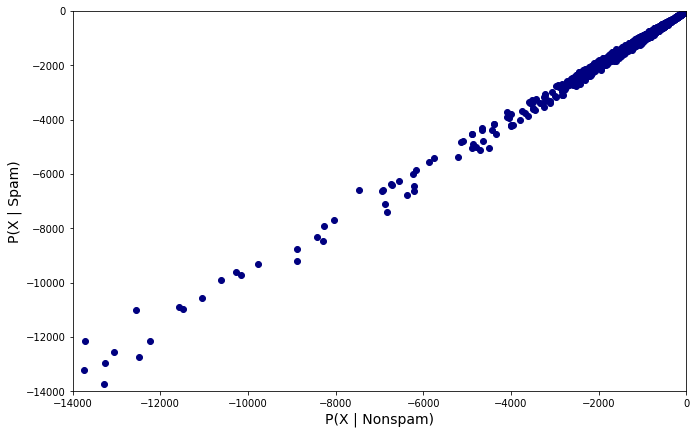

In [23]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

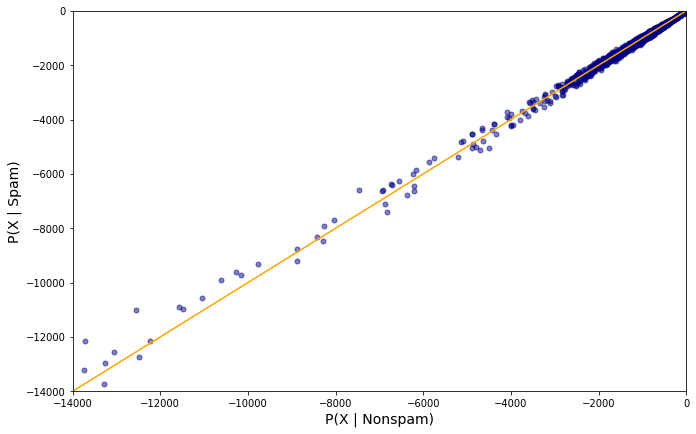

In [24]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

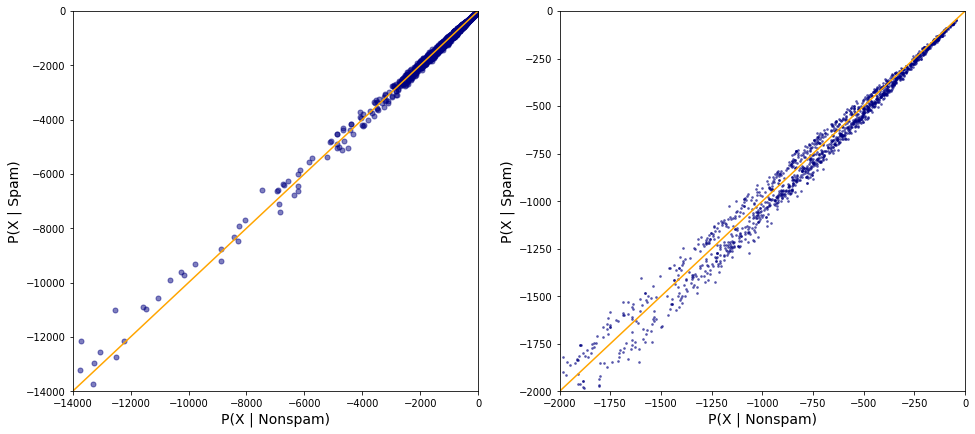

In [25]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [26]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

d:\gitrepositories\machinelearning\ml_env\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


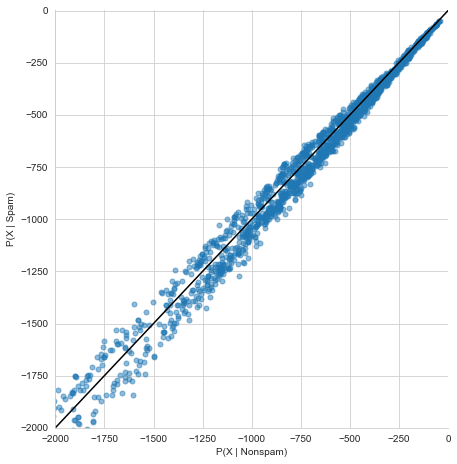

In [27]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

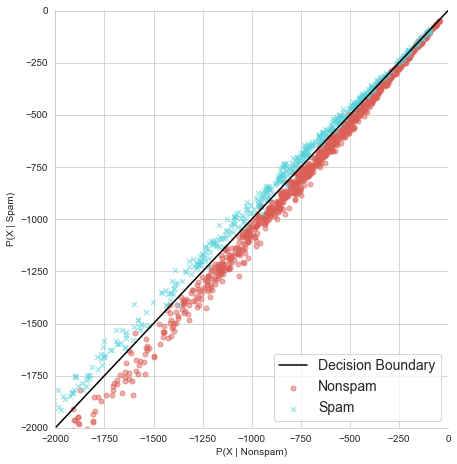

In [28]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

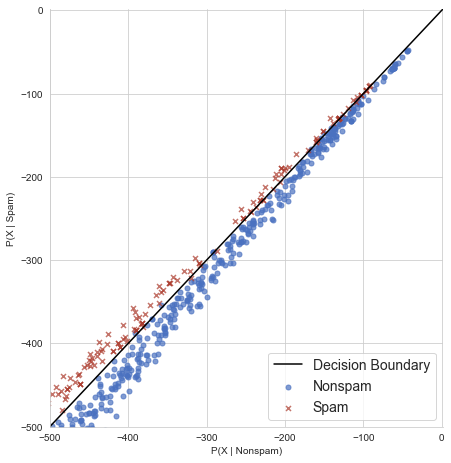

In [29]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

### False Positives and False Negatives

In [30]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1126,  613], dtype=int64))

In [31]:
true_pos = (y_test == 1) & (prediction == 1)

In [32]:
true_pos.sum()

590

**Challenge:** Create a numpy array that measures the False Positives for each datapoint. Call this variable ```false_pos```. Then work out how many false positives there were. After you've done that, do the same for the false negatives. Store those in a variable called ```false_neg```

In [33]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

23

In [34]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

14

## Recall Score

**Challenge:** Calculate the recall score. Store it in a variable called ```recall_score```. Print the value of the recall score as a percentage rounded to two decimal places.

In [35]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 97.68%


## Precision Score

**Challenge:** Calculate the precision of our naive bayes model. Store the result in a variable called ```precision_score```. Print out the precision as a decimal number rounded to three decimal places. 

In [36]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.962


## F-Score or F1 Score

In [37]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
